In [26]:
import pandas as pd
from datetime import datetime as dt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression

In [27]:
df = pd.read_csv('subscribers_new.csv')

In [28]:
df.head()

,Unnamed: 0,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,age,male_TF,...,join_fee,language,payment_type,num_trial_days,current_sub_TF,payment_period,last_payment,next_payment,cancel_date,trial_completed
0,162502,21724479,economy,NaN,comedy,access to exclusive content,NaN,NaN,NaN,False,...,NaN,ar,Standard Charter,14,True,1,2020-02-07 21:44:16,2020-06-07 21:44:16,NaN,True
1,380374,23383224,base,NaN,comedy,access to exclusive content,22.951579,NaN,70.0,False,...,0.3303,ar,NaN,14,True,1,2020-03-15 15:44:35,2020-07-15 15:44:35,NaN,True
2,496617,26844789,enhanced,3.0,regional,replace OTT,36.001186,2.0,25.0,True,...,0.1101,ar,NaN,14,False,0,NaN,NaN,NaN,True
3,356799,29417030,base,NaN,drama,replace OTT,20.051667,NaN,30.0,False,...,0.0367,ar,NaN,14,False,0,NaN,NaN,NaN,True
4,681701,26723159,base,4.0,comedy,replace OTT,22.951579,3.0,28.0,False,...,0.0367,ar,NaN,14,True,2,2020-02-19 12:57:07,2020-06-19 12:57:07,NaN,True


In [29]:
df = df[df['plan_type'] == 'base_uae_14_day_trial']

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 227096 entries, 0 to 227627
Data columns (total 31 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Unnamed: 0                    227096 non-null  int64  
 1   subid                         227096 non-null  int64  
 2   package_type                  191713 non-null  object 
 3   num_weekly_services_utilized  116840 non-null  float64
 4   preferred_genre               190961 non-null  object 
 5   intended_use                  223731 non-null  object 
 6   weekly_consumption_hour       189345 non-null  float64
 7   num_ideal_streaming_services  115251 non-null  float64
 8   age                           191927 non-null  float64
 9   male_TF                       226827 non-null  object 
 10  country                       227096 non-null  object 
 11  attribution_technical         227096 non-null  object 
 12  attribution_survey            224633 non-nul

In [47]:
data = df.drop(columns = ['Unnamed: 0','subid','language','country','months_per_bill_period','plan_type','num_trial_days','last_payment',\
                          'monthly_price','payment_type','account_creation_date','next_payment'])

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 227096 entries, 0 to 227627
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   package_type                  191713 non-null  object 
 1   num_weekly_services_utilized  116840 non-null  float64
 2   preferred_genre               190961 non-null  object 
 3   intended_use                  223731 non-null  object 
 4   weekly_consumption_hour       189345 non-null  float64
 5   num_ideal_streaming_services  115251 non-null  float64
 6   age                           191927 non-null  float64
 7   male_TF                       226827 non-null  object 
 8   attribution_technical         227096 non-null  object 
 9   attribution_survey            224633 non-null  object 
 10  op_sys                        213751 non-null  object 
 11  discount_price                227096 non-null  float64
 12  trial_end_date                227096 non-nul

### Remove negative weekly consumption hours and join fee

In [49]:
data = data[data['weekly_consumption_hour'] >= 0]
data = data[data['join_fee'] >= 0]

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 189304 entries, 1 to 227627
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   package_type                  155652 non-null  object 
 1   num_weekly_services_utilized  115463 non-null  float64
 2   preferred_genre               154900 non-null  object 
 3   intended_use                  187496 non-null  object 
 4   weekly_consumption_hour       189304 non-null  float64
 5   num_ideal_streaming_services  115103 non-null  float64
 6   age                           189304 non-null  float64
 7   male_TF                       189301 non-null  object 
 8   attribution_technical         189304 non-null  object 
 9   attribution_survey            188412 non-null  object 
 10  op_sys                        176869 non-null  object 
 11  discount_price                189304 non-null  float64
 12  trial_end_date                189304 non-nul

### Deal with unusual age values

In [51]:
data['age_corrected'] = 0     

In [52]:
for i in range(len(data['age'])):
    a = data['age'].values[i]
    if a > 1900 and a < 2020:
        data['age_corrected'].values[i] = 2020-a
    else:
        data['age_corrected'].values[i] = a

In [53]:
data = data[data['age_corrected'] < 110]

In [54]:
data['age_corrected'].values.mean()

46.187620255841

In [55]:
data = data.drop(columns = 'age')

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 189180 entries, 1 to 227627
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   package_type                  155542 non-null  object 
 1   num_weekly_services_utilized  115416 non-null  float64
 2   preferred_genre               154792 non-null  object 
 3   intended_use                  187374 non-null  object 
 4   weekly_consumption_hour       189180 non-null  float64
 5   num_ideal_streaming_services  115056 non-null  float64
 6   male_TF                       189177 non-null  object 
 7   attribution_technical         189180 non-null  object 
 8   attribution_survey            188288 non-null  object 
 9   op_sys                        176767 non-null  object 
 10  discount_price                189180 non-null  float64
 11  trial_end_date                189180 non-null  object 
 12  initial_credit_card_declined  189180 non-nul

### Fill NAs for weekly services utilized and ideal streaming services

In [57]:
a = int(data['num_weekly_services_utilized'].dropna().mode().values)
b = int(data['num_ideal_streaming_services'].dropna().mode().values)
data['num_weekly_services_utilized'] = data['num_weekly_services_utilized'].fillna(a)
data['num_ideal_streaming_services'] = data['num_ideal_streaming_services'].fillna(b)

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 189180 entries, 1 to 227627
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   package_type                  155542 non-null  object 
 1   num_weekly_services_utilized  189180 non-null  float64
 2   preferred_genre               154792 non-null  object 
 3   intended_use                  187374 non-null  object 
 4   weekly_consumption_hour       189180 non-null  float64
 5   num_ideal_streaming_services  189180 non-null  float64
 6   male_TF                       189177 non-null  object 
 7   attribution_technical         189180 non-null  object 
 8   attribution_survey            188288 non-null  object 
 9   op_sys                        176767 non-null  object 
 10  discount_price                189180 non-null  float64
 11  trial_end_date                189180 non-null  object 
 12  initial_credit_card_declined  189180 non-nul

### Deal with abnormal cancellation

In [59]:
data['cancel_date'] = data['cancel_date'].fillna(0)

In [60]:
abnormal = data[(data['current_sub_TF'] == False) & (data['payment_period'] >= 1) & (data['trial_completed'] == False)]

In [61]:
abnormal.shape

(239, 19)

In [62]:
data = data[~data.apply(tuple,1).isin(abnormal.apply(tuple,1))]

In [63]:
data.shape

(188941, 19)

### Split training and testing set

In [64]:
data_use = data.dropna()

In [65]:
data_use.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143590 entries, 2 to 227627
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   package_type                  143590 non-null  object 
 1   num_weekly_services_utilized  143590 non-null  float64
 2   preferred_genre               143590 non-null  object 
 3   intended_use                  143590 non-null  object 
 4   weekly_consumption_hour       143590 non-null  float64
 5   num_ideal_streaming_services  143590 non-null  float64
 6   male_TF                       143590 non-null  object 
 7   attribution_technical         143590 non-null  object 
 8   attribution_survey            143590 non-null  object 
 9   op_sys                        143590 non-null  object 
 10  discount_price                143590 non-null  float64
 11  trial_end_date                143590 non-null  object 
 12  initial_credit_card_declined  143590 non-nul

In [66]:
data_train1 = data_use[data_use['payment_period'] >= 1]

In [67]:
data_train1.shape

(91275, 19)

In [68]:
import numpy as np
data_train2 = data_use[np.logical_and(data_use['payment_period'] == 0,data_use['cancel_date'] != 0)]

In [69]:
data_train2.shape

(14735, 19)

In [70]:
data_train3 = data_use[(data_use['payment_period'] == 0)&(data_use['cancel_date'] == 0)&(data_use['current_sub_TF'] == False)]

In [71]:
data_train3.shape

(31720, 19)

In [72]:
frames = [data_train1,data_train2,data_train3]
data_train = pd.concat(frames)

In [73]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137730 entries, 4 to 227614
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   package_type                  137730 non-null  object 
 1   num_weekly_services_utilized  137730 non-null  float64
 2   preferred_genre               137730 non-null  object 
 3   intended_use                  137730 non-null  object 
 4   weekly_consumption_hour       137730 non-null  float64
 5   num_ideal_streaming_services  137730 non-null  float64
 6   male_TF                       137730 non-null  object 
 7   attribution_technical         137730 non-null  object 
 8   attribution_survey            137730 non-null  object 
 9   op_sys                        137730 non-null  object 
 10  discount_price                137730 non-null  float64
 11  trial_end_date                137730 non-null  object 
 12  initial_credit_card_declined  137730 non-nul

In [74]:
data_test = data_use[~data_use.apply(tuple,1).isin(data_train.apply(tuple,1))]

In [75]:
data_test.shape

(5860, 19)

In [76]:
data_train['churn'] = ''
for i in range(len(data_train)):
    if data_train['payment_period'].values[i] >= 1:
        data_train['churn'].values[i] = 0
    else:
        data_train['churn'].values[i] = 1

In [77]:
data_train['churn'].values.sum()

46455

In [78]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137730 entries, 4 to 227614
Data columns (total 20 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   package_type                  137730 non-null  object 
 1   num_weekly_services_utilized  137730 non-null  float64
 2   preferred_genre               137730 non-null  object 
 3   intended_use                  137730 non-null  object 
 4   weekly_consumption_hour       137730 non-null  float64
 5   num_ideal_streaming_services  137730 non-null  float64
 6   male_TF                       137730 non-null  object 
 7   attribution_technical         137730 non-null  object 
 8   attribution_survey            137730 non-null  object 
 9   op_sys                        137730 non-null  object 
 10  discount_price                137730 non-null  float64
 11  trial_end_date                137730 non-null  object 
 12  initial_credit_card_declined  137730 non-nul

In [ ]:
data_train.to_csv('churn_train.csv')

In [79]:
data_train = data_train.drop(columns = ['trial_end_date','cancel_date','current_sub_TF','trial_completed','discount_price','payment_period'])

In [80]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137730 entries, 4 to 227614
Data columns (total 14 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   package_type                  137730 non-null  object 
 1   num_weekly_services_utilized  137730 non-null  float64
 2   preferred_genre               137730 non-null  object 
 3   intended_use                  137730 non-null  object 
 4   weekly_consumption_hour       137730 non-null  float64
 5   num_ideal_streaming_services  137730 non-null  float64
 6   male_TF                       137730 non-null  object 
 7   attribution_technical         137730 non-null  object 
 8   attribution_survey            137730 non-null  object 
 9   op_sys                        137730 non-null  object 
 10  initial_credit_card_declined  137730 non-null  bool   
 11  join_fee                      137730 non-null  float64
 12  age_corrected                 137730 non-nul

In [88]:
data_train['churn'] = data_train['churn'].astype('int')

In [89]:
train_dummy = pd.get_dummies(data_train, drop_first=True)

In [90]:
train_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137730 entries, 4 to 227614
Data columns (total 67 columns):
 #   Column                                         Non-Null Count   Dtype  
---  ------                                         --------------   -----  
 0   num_weekly_services_utilized                   137730 non-null  float64
 1   weekly_consumption_hour                        137730 non-null  float64
 2   num_ideal_streaming_services                   137730 non-null  float64
 3   initial_credit_card_declined                   137730 non-null  bool   
 4   join_fee                                       137730 non-null  float64
 5   age_corrected                                  137730 non-null  int64  
 6   churn                                          137730 non-null  int32  
 7   package_type_economy                           137730 non-null  uint8  
 8   package_type_enhanced                          137730 non-null  uint8  
 9   preferred_genre_drama                

In [91]:
corr = train_dummy.corr(method='pearson')

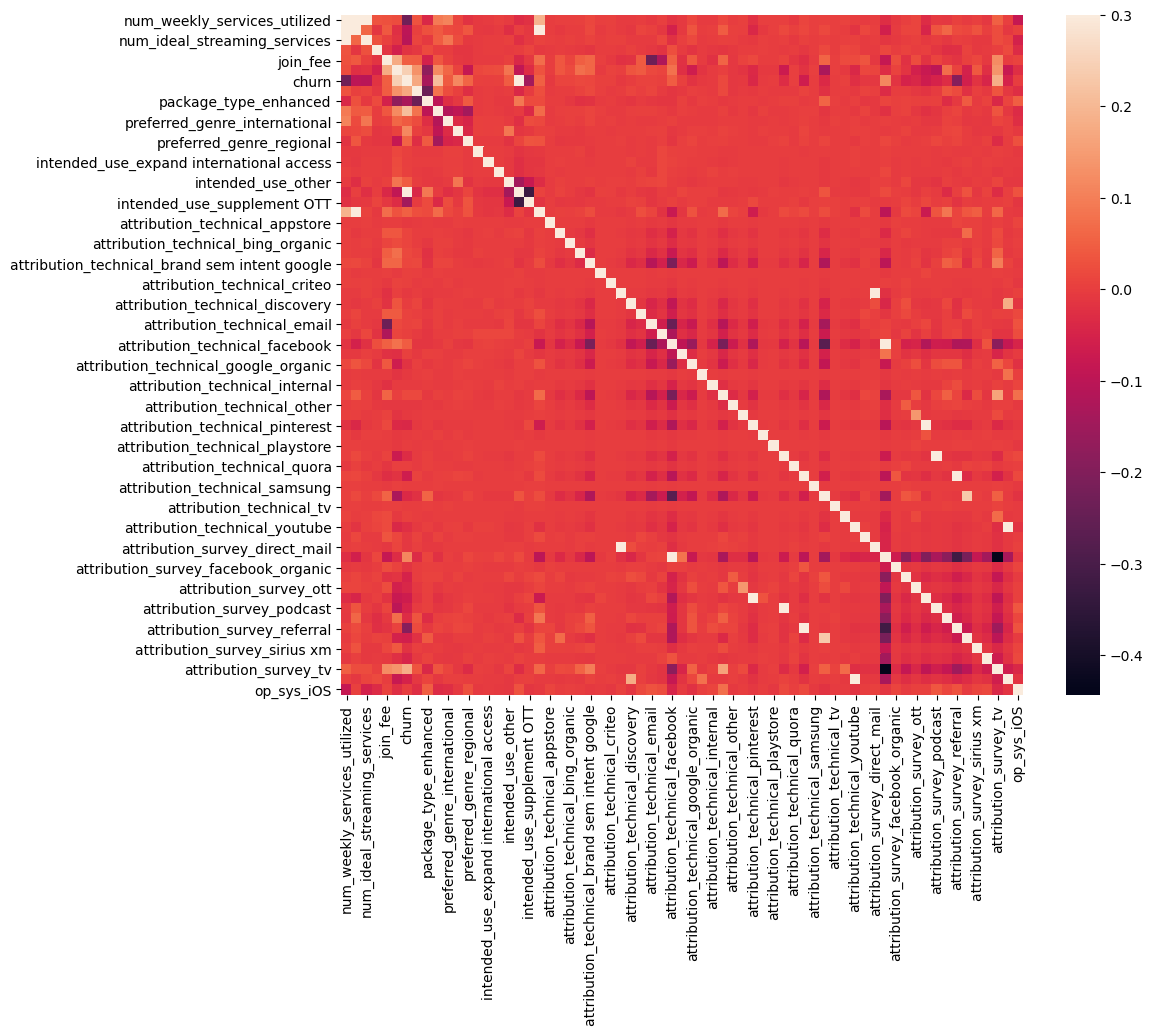

In [92]:
import seaborn as sns
plt.figure(figsize=(11, 9),dpi=100)
sns.heatmap(data=corr,vmax=0.3)

In [93]:
feature_x = [tag for tag in train_dummy.columns if tag not in ['churn']]
X = train_dummy[feature_x]
print(type(X))
print (X.shape)

<class 'pandas.core.frame.DataFrame'>
(137730, 66)


In [94]:
y = train_dummy['churn']
print (type(y))
print (y.shape)

<class 'pandas.core.series.Series'>
(137730,)


In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.7,random_state=2333)
print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)

(41319, 66)
(41319,)
(96411, 66)
(96411,)


In [158]:
lg = LogisticRegression(max_iter=10000)
lg.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [97]:
y_pred = lg.predict(X_test)

In [98]:
print('Train r2 score: ',lg.score(X_train, y_train))
print('Test r2 score: ',lg.score(X_test, y_test))

Train r2 score:  0.8696967496793243
Test r2 score:  0.8702533943222246


In [99]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

0.8486265648494573

In [100]:
from sklearn.metrics import roc_curve
fpr, tpr, thersholds = roc_curve(y_test, y_pred, pos_label=1)

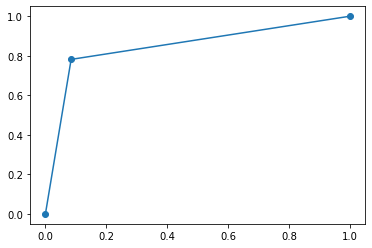

In [101]:
plt.plot(fpr,tpr,marker = 'o')

plt.show()

In [127]:
from sklearn.metrics import confusion_matrix
C = confusion_matrix(y_test, y_pred)
print(C)

[[58405  5391]
 [ 7118 25497]]


Text(30.5, 0.5, 'true')

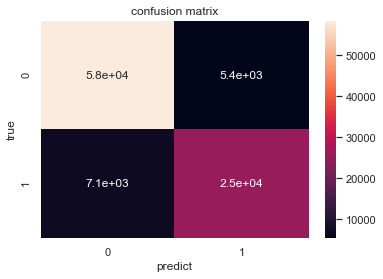

In [128]:
sns.set()
f,ax=plt.subplots()
sns.heatmap(C,annot=True,ax=ax)
ax.set_title('confusion matrix')
ax.set_xlabel('predict') 
ax.set_ylabel('true') 

In [160]:
coefficients = list(lg.coef_[0])

In [161]:
coeff = pd.DataFrame({'features':list(X.columns),'Coefficients':coefficients})

In [165]:
coeff.sort_values(by = 'Coefficients').head()

,features,Coefficients
59,attribution_survey_referral,-2.944006
0,num_weekly_services_utilized,-2.396194
7,package_type_enhanced,-1.004013
51,attribution_survey_direct_mail,-0.336357
48,attribution_technical_vod,-0.320777


In [166]:
coeff.sort_values(by = 'Coefficients').tail()

,features,Coefficients
8,preferred_genre_drama,2.445219
9,preferred_genre_international,2.489891
63,attribution_survey_tv,2.907912
16,intended_use_replace OTT,3.942786
10,preferred_genre_other,4.398323


In [167]:
train_dummy.to_csv("data_train.csv")

In [121]:
data_train['churn_pred'] = lg.predict(X)

In [169]:
data_train['churn_prob'] = ''
data_train['churn_prob'] = lg.predict_proba(X)

In [170]:
data_train

,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,male_TF,attribution_technical,attribution_survey,op_sys,initial_credit_card_declined,join_fee,age_corrected,churn,churn_pred,churn_prob
4,base,4.0,comedy,replace OTT,22.951579,3.0,False,discovery,youtube,iOS,False,0.0367,28,0,0,0.989522
6,base,2.0,comedy,access to exclusive content,20.051667,2.0,False,bing,search,Android,False,0.3303,61,0,0,0.768742
7,base,3.0,drama,access to exclusive content,34.551230,2.0,False,email,referral,iOS,False,0.0000,23,0,0,0.999693
8,base,3.0,comedy,access to exclusive content,25.851492,2.0,False,facebook,facebook,iOS,False,0.6606,73,0,0,0.784779
11,enhanced,3.0,comedy,access to exclusive content,37.451142,2.0,True,search,search,iOS,False,0.3303,24,0,0,0.999124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227593,base,3.0,comedy,replace OTT,25.851492,2.0,False,organic,facebook,iOS,False,0.0367,45,1,1,0.337453
227598,enhanced,2.0,comedy,access to exclusive content,28.751405,2.0,False,facebook,facebook,iOS,False,0.0367,55,1,0,0.811802
227604,base,3.0,regional,replace OTT,25.851492,2.0,False,facebook,facebook,iOS,False,0.1101,36,1,1,0.083049
227613,base,3.0,comedy,replace OTT,21.501623,2.0,False,facebook,facebook,Android,False,0.0367,45,1,1,0.271158


In [171]:
data_train.to_csv('data_train.csv')